In [7]:
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

In [2]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
device

device(type='mps')

In [ ]:
model_path = "resnet18_best.pt"   # model path
model = models.resnet18(weights=None)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)

state = torch.load(model_path, map_location="cpu")
model.load_state_dict(state)

model = model.to(device)
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

class_names = ["CORROSION", "NOCORROSION"] 

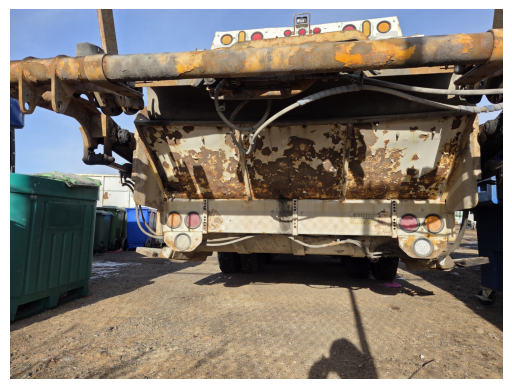

Prediction: CORROSION
Probabilities:
     CORROSION: 0.9419
   NOCORROSION: 0.0581


In [10]:
img_path = "5011.jpg"  # change

img = Image.open(img_path).convert("RGB")
plt.imshow(img)
plt.axis("off")
plt.show()

x = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    logits = model(x)                 # shape [1, 2]
    probs = torch.softmax(logits, dim=1)[0]
    pred_idx = int(torch.argmax(probs).item())

print("Prediction:", class_names[pred_idx])
print("Probabilities:")
for i, name in enumerate(class_names):
    print(f"  {name:>12}: {probs[i].item():.4f}")

In [ ]:
model = models.resnet18(weights=None)
model.fc = nn.Linear(model.fc.in_features, 2)

state = torch.load("resnet18_best.pt", map_location="cpu")
model.load_state_dict(state)
model.eval()

# torchScript
example = torch.randn(1, 3, 224, 224)
ts = torch.jit.trace(model, example)

# Freeze
ts = torch.jit.freeze(ts)

# save
ts.save("resnet18_best_torchscript.pt")

print("TorchScript model saved.")

TorchScript model saved.
